<a href="https://colab.research.google.com/github/ummadiviany/computer-vision/blob/main/CA1/CA1_Color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision Assignment 1 : Color Representations

## Task (a) : unity reflectance 

In [1]:
import numpy as np
!git clone https://github.com/ummadiviany/computer-vision.git

Cloning into 'computer-vision'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 18 (delta 3), reused 15 (delta 2), pack-reused 0
Unpacking objects: 100% (18/18), done.


1. Finding **XYZ2RGB** matrix from inverse of **RGB2XYZ**
2. Loading the given data and assigning to corresponding variables

In [2]:
# RGB = XYZ2RGB * XYZ
XYZ2RGB = np.linalg.inv([
                         [0.49,0.31,0.2],
                         [0.177,0.813,0.01],
                         [0,0.01,0.99]
                         ])

# to find true white object representation in rgb
# we need to find XYZ

# X = sum(C(lambda)*x(lambda))
# Y = sum(C(lambda)*y(lambda))
# Z = sum(C(lambda)*z(lambda))

# Need to get C and tristimulus values
#  

with open('computer-vision/CA1/CA1_Data.csv') as file:
    lines = file.read().splitlines()
    data = [[float(val) for val in line.split(',')] for line in lines]
l, x, y, z, i_p, i_s, i_u = data

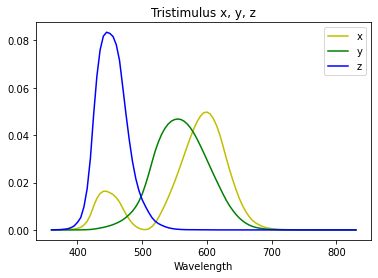

In [3]:
import matplotlib.pyplot as plt
plt.plot(l,x,'y',label='x')
plt.plot(l,y,'g',label='y')
plt.plot(l,z,'b',label='z')
plt.legend()
plt.xlabel('Wavelength')
plt.title('Tristimulus x, y, z')
plt.savefig('tri.png')

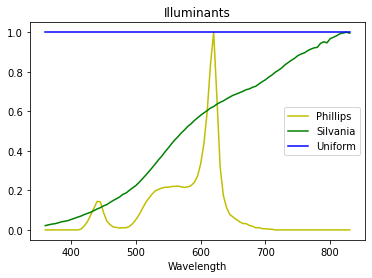

In [4]:
plt.plot(l,i_p,'y',label='Phillips')
plt.plot(l,i_s,'g',label='Silvania')
plt.plot(l,i_u,'b',label='Uniform')
plt.legend()
plt.xlabel('Wavelength')
plt.title('Illuminants')
plt.savefig('ill.png')

1. XYZ_to_RGB returns RGB values using XYZ2RGB matrix
2. get_XYZ function returns X,Y,Z values from Illumination, Tristimulus values, reflectance

In [5]:
## Task A
# Reflatance p = 1 for all l

def get_XYZ(I,x,y,z,l):
    X = sum([a*b for a,b,c in zip(I,x,l)])
    Y = sum([a*b for a,b,c in zip(I,y,l)])
    Z = sum([a*b for a,b,c in zip(I,z,l)])
    return X,Y,Z

def XYZ_to_RGB(X, Y, Z):
    return [sum([a*b for a,b in zip(XYZ2RGB[i],[X,Y,Z])])*255 for i in range(len(XYZ2RGB[0]))]

def get_rounded(l):
    return [round(x,2) for x in l]
def get_rounded_rgb(l):
    return [round(x) for x in l]

In [6]:
# For illuminant phillips

X_p, Y_p, Z_p = get_rounded(get_XYZ(i_p,x,y,z,l))
R_p, G_p, B_p = get_rounded_rgb(XYZ_to_RGB(X_p,Y_p,Z_p))
print("\n-------Illuminant Phillips----------\n")
print("X_p, Y_p, Z_p\t:\t",X_p, Y_p, Z_p)
print("R_p, G_p, B_p\t:\t",R_p, G_p, B_p)

# For illuminant silvania 
X_s, Y_s, Z_s = get_rounded(get_XYZ(i_s,x,y,z,l))
R_s, G_s, B_s = get_rounded_rgb(XYZ_to_RGB(X_s,Y_s,Z_s))
print("\n-------Illuminant Silvania----------\n")
print("X_s, Y_s, Z_s\t:\t",X_s, Y_s, Z_s)
print("R_s, G_s, B_s\t:\t",R_s, G_s, B_s)

# For illuminant uniform
X_u, Y_u, Z_u = get_rounded(get_XYZ(i_u,x,y,z,l))
R_u, G_u, B_u = get_rounded_rgb(XYZ_to_RGB(X_u,Y_u,Z_u))
print("\n-------Illuminant Uniform----------\n")
print("X_u, Y_u, Z_u\t:\t",X_u, Y_u, Z_u)
print("R_u, G_u, B_u\t:\t",R_u, G_u, B_u)



-------Illuminant Phillips----------

X_p, Y_p, Z_p	:	 0.29 0.24 0.06
R_p, G_p, B_p	:	 113 51 15

-------Illuminant Silvania----------

X_s, Y_s, Z_s	:	 0.48 0.44 0.13
R_s, G_s, B_s	:	 173 100 32

-------Illuminant Uniform----------

X_u, Y_u, Z_u	:	 1.0 1.0 1.0
R_u, G_u, B_u	:	 255 255 255


## Task (b) : Uniform Illuminant
1. Using Uniform illuminant
2. Reflectance = w(lambda)/max(w) where w belongs to x, y, z

In [7]:
#### Task B
# Uniform Illumination spectra
# reflectance p(l) = w(l)/max(w)

def get_reflectance(w):
    max_w = max(w)
    return [val_w/max_w for val_w in w]


In [9]:
px = get_reflectance(x)
py = get_reflectance(y)
pz = get_reflectance(z)

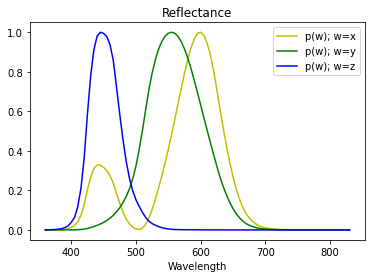

In [10]:
import matplotlib.pyplot as plt
plt.plot(l,px,'y',label='p(w); w=x')
plt.plot(l,py,'g',label='p(w); w=y')
plt.plot(l,pz,'b',label='p(w); w=z')
plt.legend()
plt.xlabel('Wavelength')
plt.title('Reflectance')
plt.savefig('ref.png')

In [8]:
# for p(x)

X,Y,Z = get_rounded(get_XYZ(px,x,y,z,l))
R,G,B = get_rounded_rgb(XYZ_to_RGB(X,Y,Z))
print("\n---------Illumination is Uniform and reflectance p=x(lambda)/max(x)-------------\n")
print("X,Y,Z\t:\t",X,Y,Z)
print("R,G,B\t:\t",R,G,B)

# for p(y)

X,Y,Z = get_rounded(get_XYZ(py,x,y,z,l))
R,G,B = get_rounded_rgb(XYZ_to_RGB(X,Y,Z))
print("\n---------Illumination is Uniform and reflectance p=y(lambda)/max(y)-------------\n")
print("X,Y,Z\t:\t",X,Y,Z)
print("R,G,B\t:\t",R,G,B)

# for p(z)

X,Y,Z = get_rounded(get_XYZ(pz,x,y,z,l))
R,G,B = get_rounded_rgb(XYZ_to_RGB(X,Y,Z))
print("\n---------Illumination is Uniform and reflectance p=z(lambda)/max(z)-------------\n")
print("X,Y,Z\t:\t",X,Y,Z)
print("R,G,B\t:\t",R,G,B)


---------Illumination is Uniform and reflectance p=x(lambda)/max(x)-------------

X,Y,Z	:	 0.63 0.5 0.23
R,G,B	:	 238 104 58

---------Illumination is Uniform and reflectance p=y(lambda)/max(y)-------------

X,Y,Z	:	 0.53 0.72 0.08
R,G,B	:	 146 194 19

---------Illumination is Uniform and reflectance p=z(lambda)/max(z)-------------

X,Y,Z	:	 0.13 0.04 0.74
R,G,B	:	 -19 14 190
